In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('/content/NVDA.US_D1.csv')
df.head()

,datetime,open,high,low,close,volume
0,1999-01-22,5.56,5.86,4.65,4.90,5330300
1,1999-01-25,5.31,5.50,4.92,5.43,1028900
2,1999-01-26,5.50,5.61,4.93,5.01,695000
3,1999-01-27,5.03,5.15,4.75,5.00,472200
4,1999-01-28,5.00,5.03,4.95,4.98,378900


In [6]:
df.shape

(6374, 6)

In [7]:
df.describe()

,open,high,low,close,volume
count,6374.000000,6374.000000,6374.000000,6374.000000,6.374000e+03
mean,51.749827,52.737446,50.806425,51.834081,1.221795e+07
std,108.838918,110.879082,107.100123,109.201120,1.162399e+07
min,1.500000,1.590000,1.430000,1.480000,3.104000e+03
25%,4.290000,4.370000,4.210000,4.290000,4.878803e+06
50%,7.600000,7.760000,7.480000,7.620000,8.466437e+06
75%,40.780000,41.477500,40.150000,40.845000,1.522651e+07
max,927.080000,974.000000,886.760000,927.040000,1.057089e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6374 entries, 0 to 6373
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  6374 non-null   object 
 1   open      6374 non-null   float64
 2   high      6374 non-null   float64
 3   low       6374 non-null   float64
 4   close     6374 non-null   float64
 5   volume    6374 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 298.9+ KB


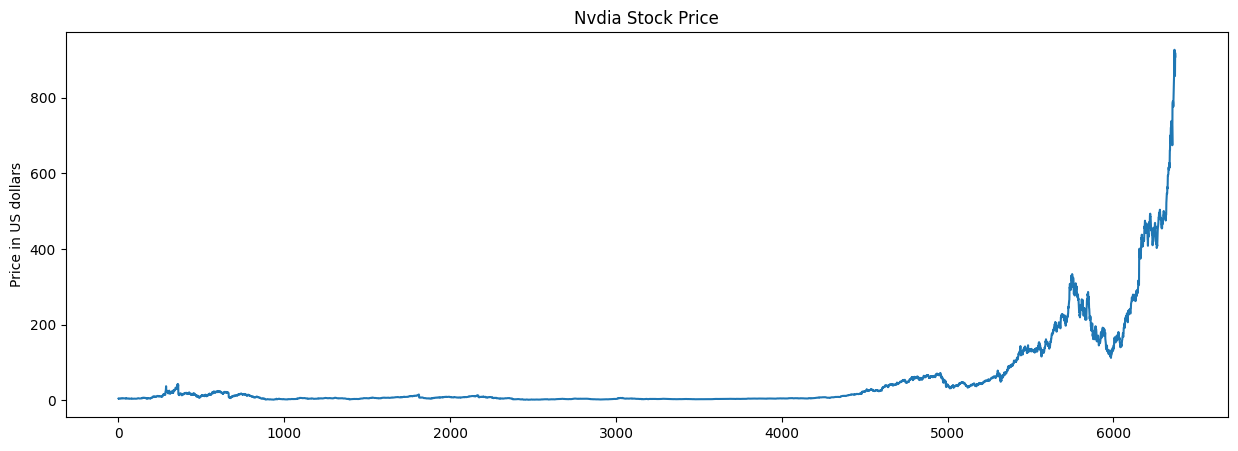

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df['close'])
plt.title('Nvdia Stock Price')
plt.ylabel('Price in US dollars')
plt.show()

In [10]:
df.head()

,datetime,open,high,low,close,volume
0,1999-01-22,5.56,5.86,4.65,4.90,5330300
1,1999-01-25,5.31,5.50,4.92,5.43,1028900
2,1999-01-26,5.50,5.61,4.93,5.01,695000
3,1999-01-27,5.03,5.15,4.75,5.00,472200
4,1999-01-28,5.00,5.03,4.95,4.98,378900


In [11]:
df.isnull().sum()

,0
datetime,0
open,0
high,0
low,0
close,0
volume,0


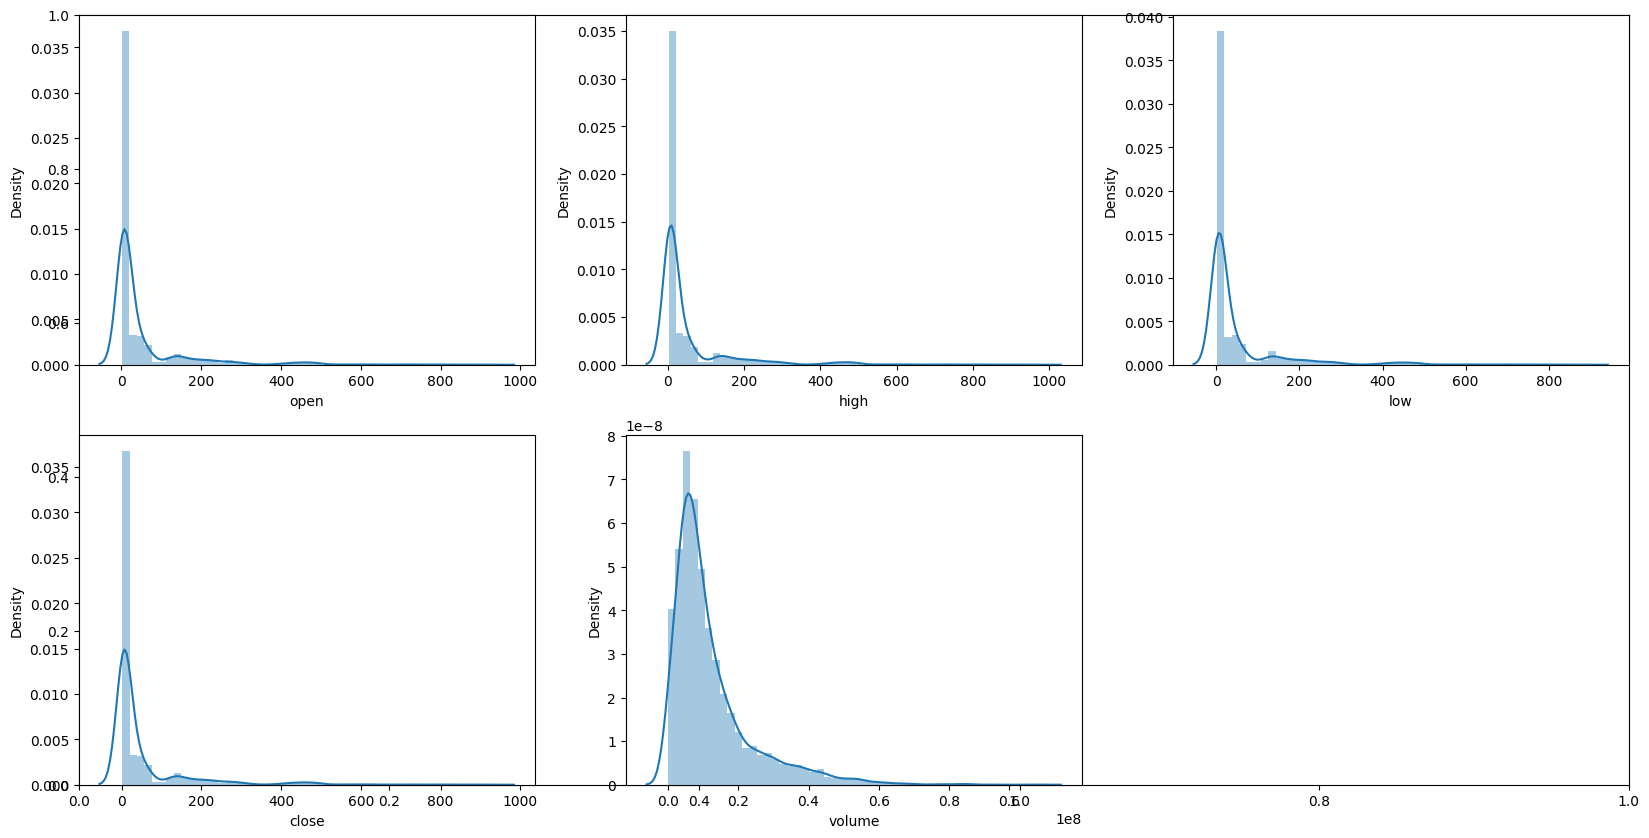

In [12]:
feature = ['open','high','low','close','volume']
plt.subplots(figsize=(20,10))

for i, col in enumerate(feature):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

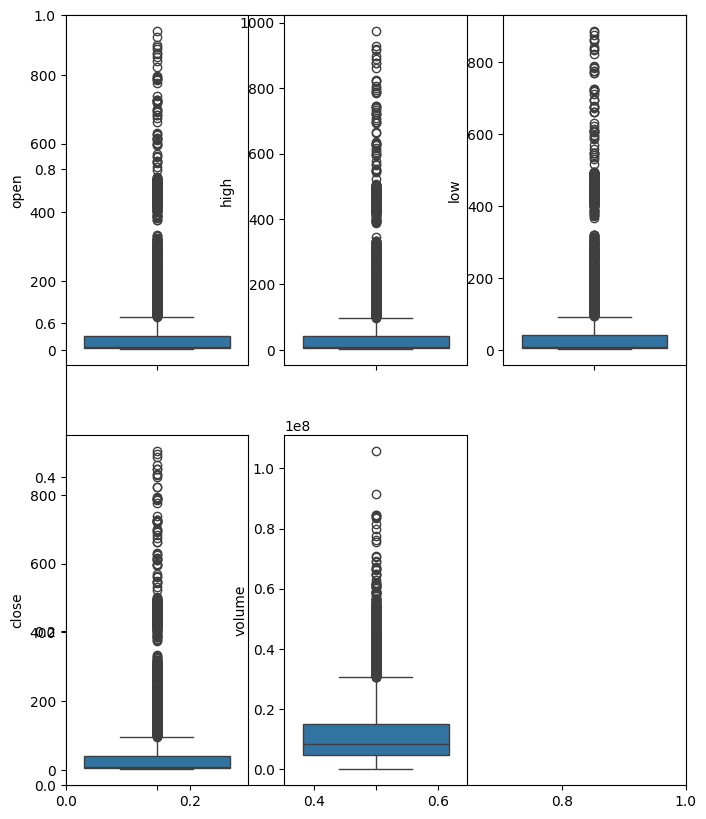

In [13]:
plt.subplots(figsize=(8,10))
for i, col in enumerate(feature):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col],vert=True)
plt.show()

In [14]:
splitted=df['datetime'].str.split('-',expand=True)

df['year']=splitted[0].astype('int')
df['month']=splitted[1].astype('int')
df['date']=splitted[2].astype('int')
df.head()

,datetime,open,high,low,close,volume,year,month,date
0,1999-01-22,5.56,5.86,4.65,4.90,5330300,1999,1,22
1,1999-01-25,5.31,5.50,4.92,5.43,1028900,1999,1,25
2,1999-01-26,5.50,5.61,4.93,5.01,695000,1999,1,26
3,1999-01-27,5.03,5.15,4.75,5.00,472200,1999,1,27
4,1999-01-28,5.00,5.03,4.95,4.98,378900,1999,1,28


In [15]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,datetime,open,high,low,close,volume,year,month,date,is_quarter_end
0,1999-01-22,5.56,5.86,4.65,4.90,5330300,1999,1,22,0
1,1999-01-25,5.31,5.50,4.92,5.43,1028900,1999,1,25,0
2,1999-01-26,5.50,5.61,4.93,5.01,695000,1999,1,26,0
3,1999-01-27,5.03,5.15,4.75,5.00,472200,1999,1,27,0
4,1999-01-28,5.00,5.03,4.95,4.98,378900,1999,1,28,0


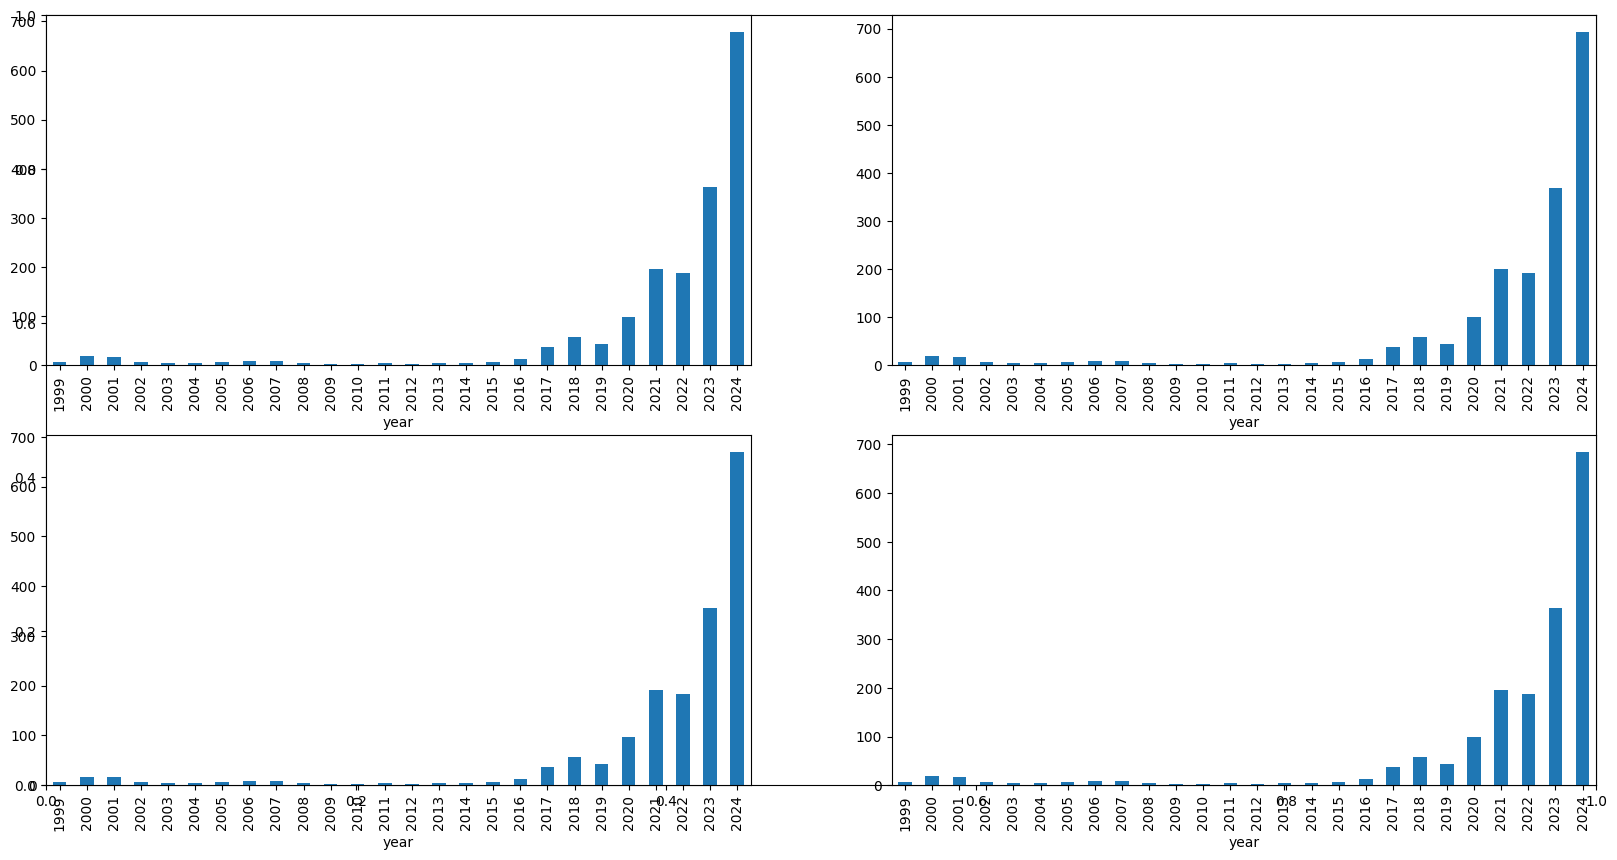

In [16]:
data_grouped = df.drop('datetime', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['open','high','low','close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [17]:
df.drop('datetime', axis=1).groupby('is_quarter_end').mean()

,open,high,low,close,volume,year,month,date
is_quarter_end,,,,,,,,
0,51.406143,52.406103,50.475464,51.513507,1.246586e+07,2011.237060,6.046088,15.724651
1,52.428376,53.391629,51.459851,52.467000,1.172851e+07,2011.173588,7.423705,15.734484


In [18]:
df['open-close']  = df['open'] - df['close']
df['low-high']  = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

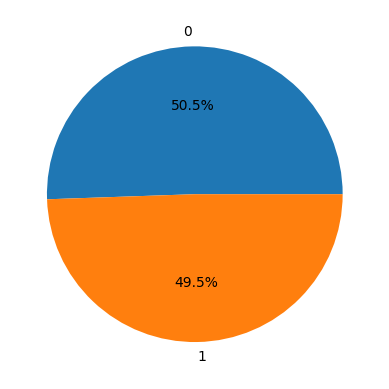

In [19]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

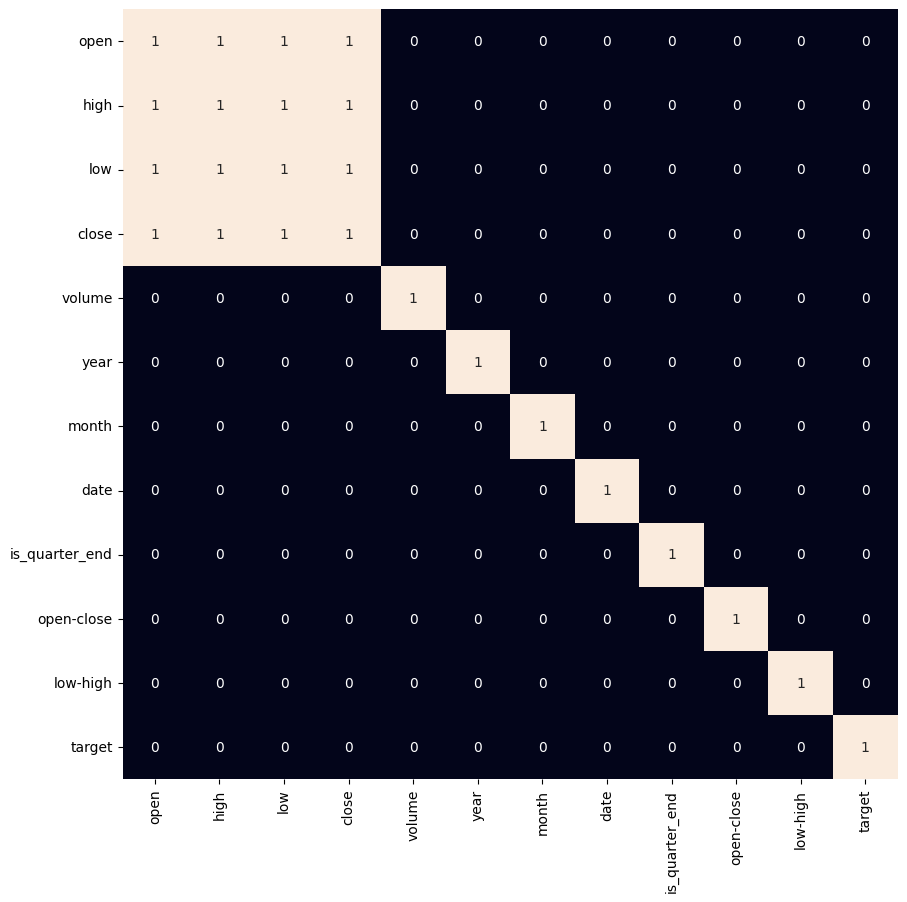

In [20]:
plt.figure(figsize=(10, 10))

sb.heatmap(df.drop('datetime', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [21]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(5736, 3) (638, 3)


In [22]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5247063323331145
Validation Accuracy :  0.5173784789021418

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5251228572098985
Validation Accuracy :  0.5187498150176103

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Traini

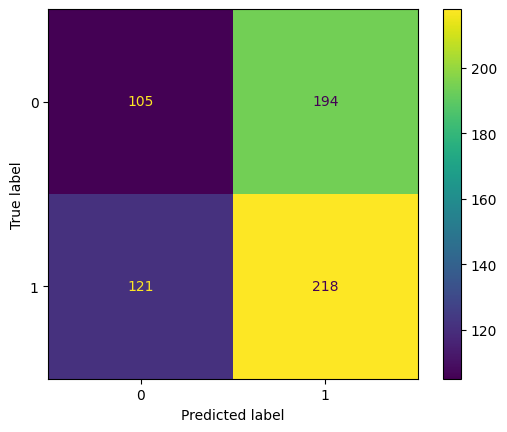

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

In [24]:
!pip install xgboost